In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, GammaRegressor, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,BaggingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [99]:
df = pd.read_csv("TaxiFare.csv")

In [100]:
df.head().style.background_gradient(cmap='ocean')

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.500000,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.900000,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.700000,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.700000,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.300000,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [101]:
df.shape

(50000, 8)

In [102]:
df.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [104]:
# drop unique_id column
df.drop(['unique_id'],axis=1,inplace=True)

In [105]:
#df.head()

In [106]:
df.describe().style.background_gradient(cmap='cool')

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


- From the descriptive statistics of the data:
- there are no missing values
- And there are some outliers that needs to be treated
- 

In [107]:
# check the missing values
df.isna().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [108]:
df['month']=pd.to_datetime(df['date_time_of_pickup']).dt.month
df['day']=pd.to_datetime(df['date_time_of_pickup']).dt.day
df['year']=pd.to_datetime(df['date_time_of_pickup']).dt.year


In [109]:
# drop date_time_of_pickup
df.drop(['date_time_of_pickup'],axis=1, inplace=True)

In [110]:
# check duplicates
duplicate =df.duplicated()
print(duplicate.sum())

1


In [111]:
df=df.drop_duplicates()

### Exploratory Data Analysis

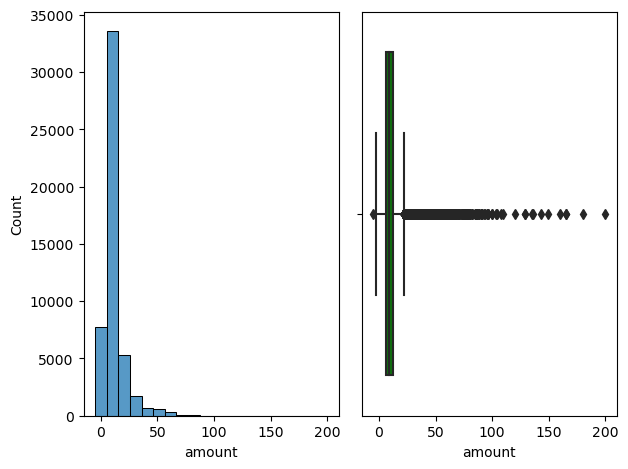

In [112]:

plt.subplot(121)
sns.histplot(x=df['amount'],data=df, bins=20)
plt.subplot(122)
sns.boxplot(x=df['amount'], color='green')
plt.tight_layout()
plt.show()

- Most of the amount fall within the range of 0-60
- there are alot of outliers in amount column

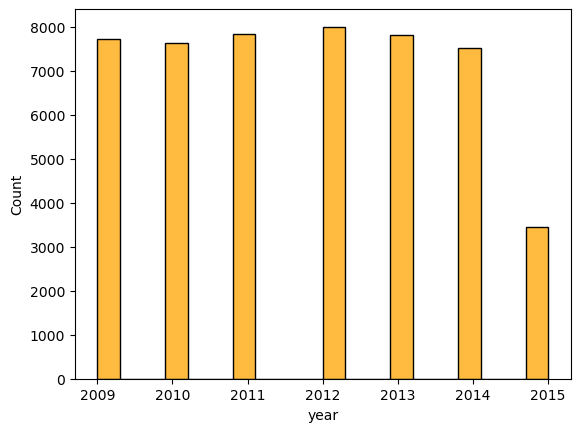

In [113]:
sns.histplot(x=df['year'],data=df, color='orange', bins=20)
plt.show()

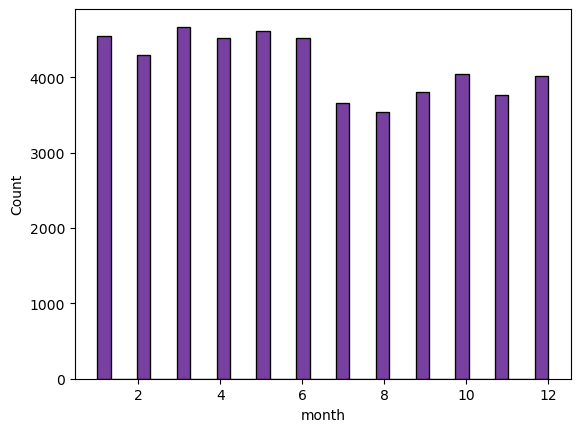

In [114]:
sns.histplot(x=df['month'],data=df, color='indigo')
plt.show()

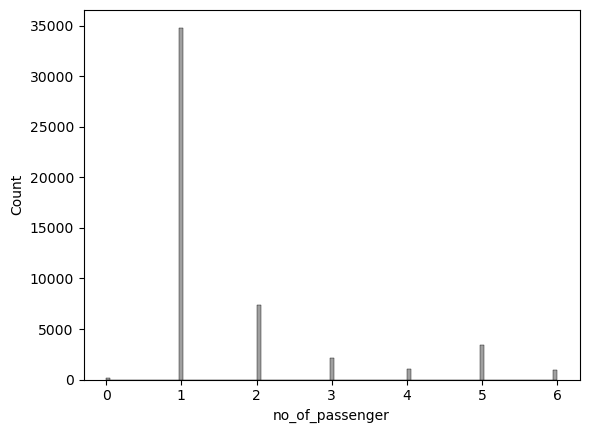

In [115]:

sns.histplot(x=df['no_of_passenger'],data=df, color='gray')

plt.show()

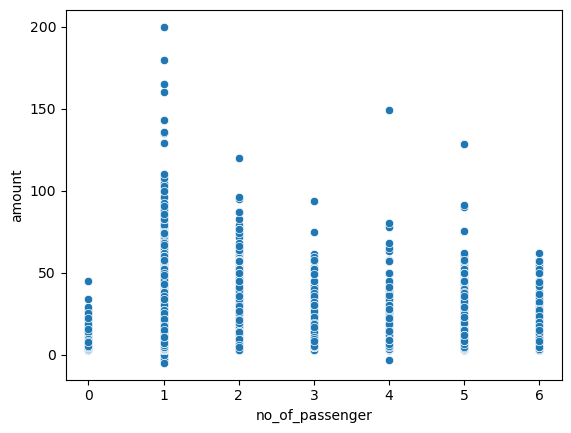

In [116]:
sns.scatterplot(x=df['no_of_passenger'],y=df['amount'])
plt.show()

- when the no. of passenger is 1, the amount is a little bit high

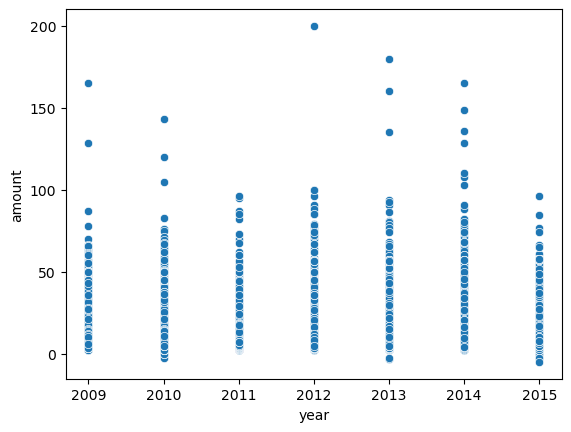

In [117]:

sns.scatterplot(x=df['year'],y=df['amount'])

plt.show()

#### Correlation between variable

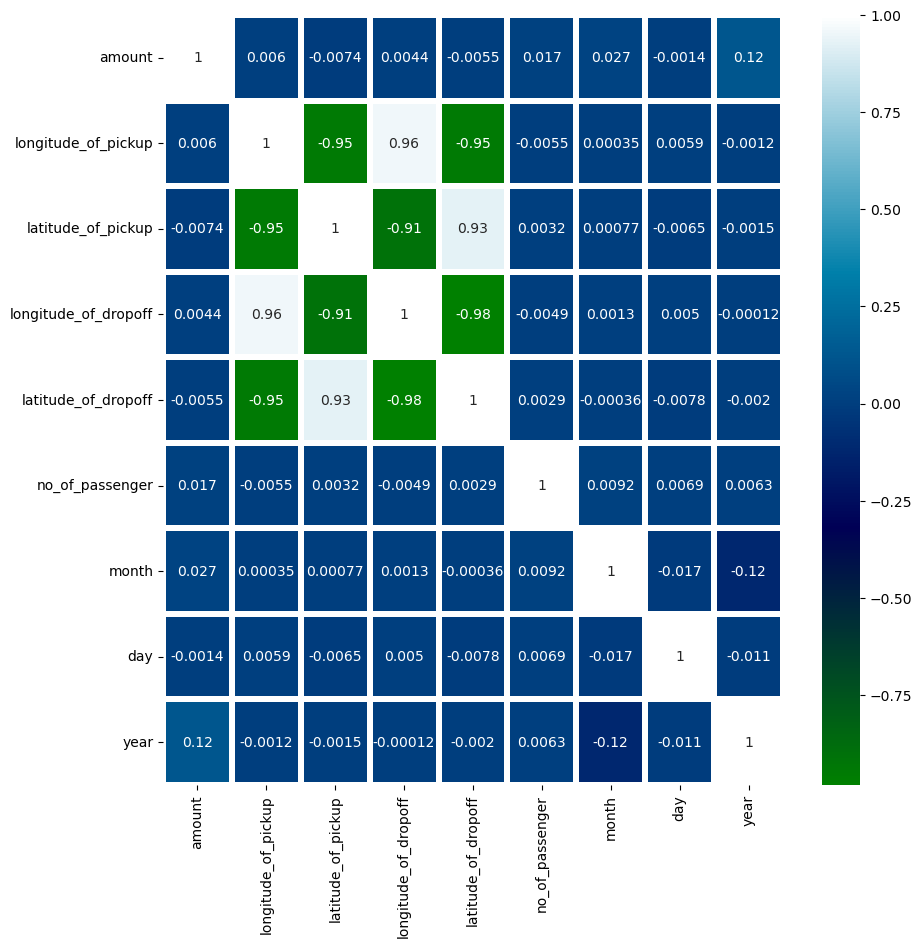

In [118]:
cor= df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True, cmap='ocean',linewidths=3)
plt.show()

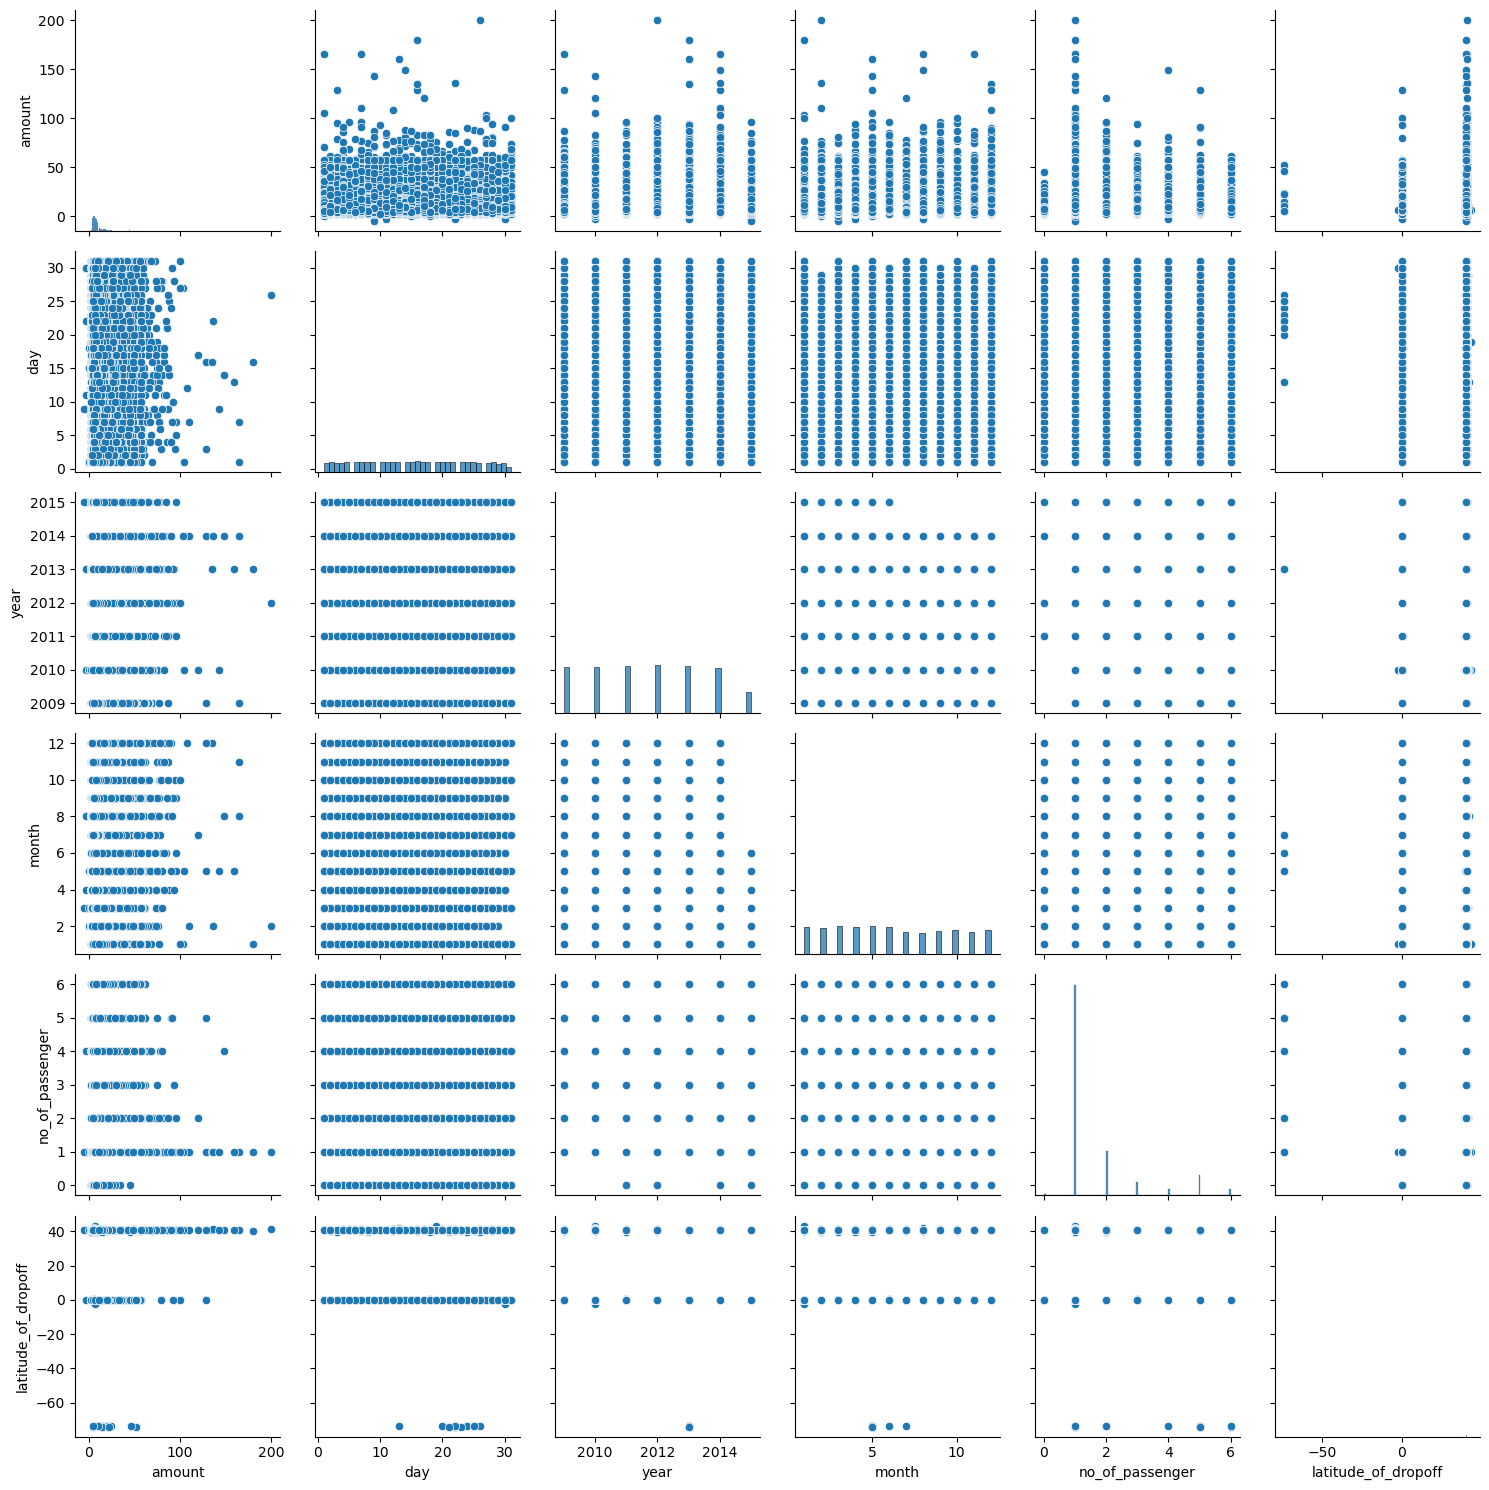

In [119]:
sns.pairplot(df,vars=['amount','day','year','month','no_of_passenger','latitude_of_dropoff'])
plt.tight_layout()
plt.show()

#### create function to remove outliers

In [120]:
def remove_outlier(data):
    for col in data.columns:
        q1,q3 = data[col].quantile([0.25,0.75])
        iqr = q3-q1
        upper = q3+1.5*iqr
        lower = q1-1.5*iqr
        
        data[col]=np.where(data[col]>upper,upper,data[col])
        data[col]=np.where(data[col]<lower,lower,data[col])
        
    return data

In [121]:
df = remove_outlier(df)

In [122]:
df.describe().style.background_gradient(cmap='ocean')

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,day,year
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,10.107230,-73.978298,40.750267,-73.976011,40.750479,1.504650,6.273265,15.671873,2011.739295
std,5.464407,0.020516,0.025702,0.022835,0.028529,0.867913,3.461183,8.660795,1.862641
min,-3.750000,-74.029429,40.686161,-74.032503,40.683683,0.000000,1.000000,1.000000,2009.000000
25%,6.000000,-73.992062,40.734881,-73.991152,40.734374,1.000000,3.000000,8.000000,2010.000000
50%,8.500000,-73.981840,40.752679,-73.980083,40.753372,1.000000,6.000000,16.000000,2012.000000
75%,12.500000,-73.967151,40.767361,-73.963584,40.768167,2.000000,9.000000,23.000000,2013.000000
max,22.250000,-73.929783,40.816081,-73.922233,40.818857,3.500000,12.000000,31.000000,2015.000000


- Outliers have been removed

In [123]:
#sns.boxplot(x=df['amount'])

### Split the dataset in train and test set


In [124]:
X =df.drop(['amount'],axis=1)
Y = df['amount']

In [125]:
X.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,day,year
0,-73.929783,40.721319,-73.922233,40.712278,1.0,6.0,15.0,2009.0
1,-74.016048,40.711303,-73.979268,40.782004,1.0,1.0,5.0,2010.0
2,-73.982738,40.761270,-73.991242,40.750562,2.0,8.0,18.0,2011.0
3,-73.987130,40.733143,-73.991567,40.758092,1.0,4.0,21.0,2012.0
4,-73.968095,40.768008,-73.956655,40.783762,1.0,3.0,9.0,2010.0


In [126]:
Y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: amount, dtype: float64

##### Train test split

In [127]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [128]:
print(x_train.shape)
print(x_test.shape)

(39999, 8)
(10000, 8)


In [129]:
print(y_train.shape)
print(y_test.shape)

(39999,)
(10000,)


### Standardize  the data

In [130]:
scaler = StandardScaler()
x_train =scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### create model evaluation function

In [131]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_square = r2_score(true,predicted)
    
    return mae,rmse,r2_square

#### Build the regression models

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "GradientBoosting Regressor": GradientBoostingRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "SVR": SVR()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train) # train model
    
    # make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae  ,model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Performance for Training set")
    print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-Mean Squared Error: {:.4f}".format(model_train_mae))
    print("-R2 Score: {:.4f}".format(model_train_r2))
    
    print('-'*36)
    
    print("Model Performance for Test set")
    print("-Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-Mean Squared Error: {:.4f}".format(model_test_mae))
    print("-R2 Score: {:.4f}".format(model_test_r2))
    
    r2_list.append(model_test_r2)
    
    print('='*36)
    print('\n')
    
    
    
    

Linear Regression
Model Performance for Training set
-Root Mean Squared Error: 5.1561
-Mean Squared Error: 4.0946
-R2 Score: 0.1093
------------------------------------
Model Performance for Test set
-Root Mean Squared Error: 5.1432
-Mean Squared Error: 4.0773
-R2 Score: 0.1155


GradientBoosting Regressor
Model Performance for Training set
-Root Mean Squared Error: 3.1512
-Mean Squared Error: 2.3254
-R2 Score: 0.6673
------------------------------------
Model Performance for Test set
-Root Mean Squared Error: 3.2208
-Mean Squared Error: 2.3823
-R2 Score: 0.6531


AdaBoostRegressor
Model Performance for Training set
-Root Mean Squared Error: 4.5376
-Mean Squared Error: 3.8396
-R2 Score: 0.3101
------------------------------------
Model Performance for Test set
-Root Mean Squared Error: 4.5575
-Mean Squared Error: 3.8494
-R2 Score: 0.3055


Decision Tree
Model Performance for Training set
-Root Mean Squared Error: 0.2633
-Mean Squared Error: 0.0130
-R2 Score: 0.9977
--------------------